In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
t_start = time.time()
mel_layer = Spectrogram.STFT()
time_used = time.time()-t_start
print(time_used)

4.46762752532959


In [4]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [5]:
y_torch.shape

torch.Size([1770, 80000])

In [6]:
timing = []

for e in range(20):
    t_start = time.time()
    spec = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.011688947677612305
0.0021555423736572266
0.0007154941558837891
0.0005259513854980469
0.00048422813415527344
0.0004780292510986328
0.0004546642303466797
0.00046062469482421875
0.0004832744598388672
0.000469207763671875
0.00045752525329589844
0.000453948974609375
0.00045871734619140625
0.0005688667297363281
0.0005726814270019531
0.0005450248718261719
0.0005426406860351562
0.0005426406860351562
0.0005276203155517578
0.0005011558532714844


In [7]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.00115433931350708
std =  0.0024438180215662604


In [8]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'

In [9]:
data.to_csv('Spec_torch_GPU')

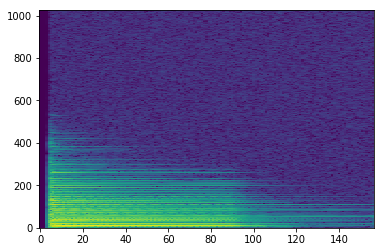

In [10]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower')